In [1]:
import numpy as np
from numpy import sqrt, cos, sin
import matplotlib
import matplotlib.pyplot as plt

# Solution of nonlinear system of equations 


Consider polynomials for a moment. You are probably already aware that there is no general algebraic formula for the roots of fifth degree polynomials or above. In fact you might have come across the Newton-Raphson algorithm precisely in this context, that is, obtaining the zeros of higher order polynomials numerically. If you have, then this notebook won't be too alien. In the previous python notebook and video 1 (nonlinearities in solid mechanics) we already talked about expanding the nonlinear function of a problem using Taylor series to end up with a polynomial of manageable order (for which we could solve exactly). However, many times we might want to solve the original problem directly. Because the solution can have no algebraic solution, we have to do numerically. The Newton-Raphson algorithm was already implemented in the previous Python notebook to compute the *exact* solution, so you can go back and check those solutions as well after doing the activities of this notebook. 

Problem for a function of a single variable: find $x$ such that $f(x)=0$

The Newton-Raphson algorithm is simply to start with some guess $x^{(0)}$ and then do 

$$x^{(i+1)}=x^{(i)} - \frac{f(x^{(i)})}{f'(x^{(i)})}$$

where $f'(x)$ is the derivative of $f$ with respect to $x$. 

## Example 1

Find the roots of 

$ 4x^5 +3x^4 + 2x^3 + x^2 -1 = 0$

In [2]:
## Defining the function and it's derivative 
# NOTE: that's all we need to be able to do, evaluate the function and its derivative! 

def f(x): 
    return 4*x**5 + 3*x**4 + 2*x**3 + x**2 - 1 

def fprime(x):
    return 20*x**4 + 12*x**3 + 6*x**2 + 2*x 



In [33]:
## Newton raphson, 
# start with some guess 
x_i = 1
# this array is to store all the steps of the NR algorithm 
x_sol = [x_i]
# LOOP until convergence or max number of iterations has been reached 
# evaluate the function to see how far we are from the solution 
res = f(x_i) 
# tolerance for convergence 
tol = 1e-7
# max number of iterations and iteration counter
iter = 0
max_iter = 20
# now the loop 
while np.abs(res)>tol and iter<max_iter:
    # calcualte the new value for x
    x_i1 = x_i - f(x_i)/fprime(x_i)
    # compute the new value of the function to see how close we are to f==0
    res = f(x_i1)
    # reset the variable x_i for the next iteration 
    x_i = x_i1 
    # increment of iterations 
    iter += 1 
    # print so you can see how the residual goes down with every iteration 
    print('iter = ',iter,'res = ',res)
    # store the solution so we can plot the path of the solution later 
    x_sol.append(x_i)
print('\nFINAL value of f(x) was ',res, ' at x = ',x_i)
if iter<max_iter:
    print('the solution converged! (up to desired tolerance)')

iter =  1 res =  2.7321711328125
iter =  2 res =  0.6974499167192494
iter =  3 res =  0.1061922799480044
iter =  4 res =  0.004006006811365648
iter =  5 res =  6.389191156586094e-06
iter =  6 res =  1.6329160246186802e-11

FINAL value of f(x) was  1.6329160246186802e-11  at x =  0.5328203015411785
the solution converged! (up to desired tolerance)


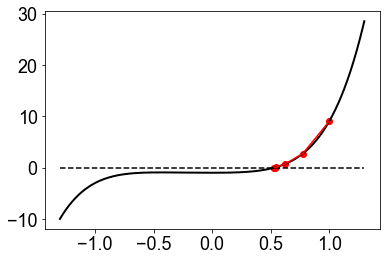

In [34]:
# plot just to get an idea
x_ls = np.linspace(-1.3,1.3,200)
font = {'family' : 'Arial',
        'size'   : 18}
matplotlib.rc('font', **font)
# plotting the function
plt.plot(x_ls,f(x_ls),color='black',linewidth=2)
# plot the y=0 line
plt.plot(x_ls,np.zeros((200)),color='black',linestyle='dashed')
# plot the sequence of steps of the NR
plt.plot(x_sol,f(np.asarray(x_sol)),color='red')
plt.scatter(x_sol,f(np.asarray(x_sol)),color='red')
#plt.savefig('L02E1r.png')

**Activity** 

Repeat the evaluation of the algorithm in the example, but for different initial guesses
* Do you always get to the solution regardless of where you start? I recommend trying the initial points [-0.8,-0.3,0.2, 0.7]
* How many iterations does it take to converge as you start with guesses that are farther from the actual zero of the polynomial? 
* Try with the initial guess $x^{(0)}=0$, what happens? 

## Example 2

Solve: 

$ R_1(x_1,x_2) \equiv 2x_1^2x_2 - 2x_1x_2^2 + x_1x_2 - 1 = 0$

$ R_2(x_1, x_2) \equiv x_1 - x_2 = 0$

The algorithm is described in the video. Briefly, now we have a vector of unknowns, in this case $\mathbf{x}=[x_1,x_2]$, and we have a vector of equations we want to solve $\mathbf{R}(\mathbf{x})$. We have some initial guess $mathbf{x}^{(0)} = [x_1^{(0)},x_2^{(0)}]$, the Newton Raphson algorithm is 

$$\mathbf{x}^{(i+1)} = \mathbf{x}^{(i)} - \mathbf{K}^{-1} \mathbf{R}(\mathbf{x}^{(i)})$$ 

where the matrix $\mathbf{K}^{-1}$ is the inverse of the tangent matrix $\mathbf{K}$. The tangent matrix is basically the gradient of the residual function with respect to the vector of variables 

$$\mathbf{K} = \frac{\partial \mathbf{R}(\mathbf{x})}{\partial \mathbf{x}}$$ 

Note that if we have a vecto of $m$ unknowns and a corresponding system of $m$ equations, then the matrix $\mathbf{K}$ is $m\times m$. In this case, the matrix is $2\times 2$ and we can expand a little 

$$
\mathbf{K} = \begin{pmatrix}\frac{\partial R_1(x_1,x_2)}{\partial x_1}&\frac{\partial R_1(x_1,x_2)}{\partial x_2}\\ \frac{\partial R_2(x_1,x_2)}{\partial x_1}&\frac{\partial R_2(x_1,x_2)}{\partial x_2} \end{pmatrix}
$$

In this particular case it is easy to take the derivatives of the polynomials and explicitly write 

$$
\mathbf{K} = \begin{pmatrix} 4x_1 x_2 -2x_2^2+x_2 & 2x_1^2-4x_1 x_2 + x_1\\ 1&-1 \end{pmatrix}
$$

Note again, as before, all we need to be able to do is evaluate the function and the tange matrix, and then just let the algorithm run and hopefully it will work :) 

In [13]:
def res(x):
    res1 = 2*x[0]**2*x[1] - 2*x[0]*x[1]**2+x[0]*x[1]-1
    res2 = x[0]-x[1]
    
    return np.array([res1,res2])

def dres(x):
    dres1dx1 = 4*x[0]*x[1] - 2*x[1]**2+x[1]
    dres1dx2 = 2*x[0]**2 - 4*x[0]*x[1]+x[0]
    dres2dx1 = 1
    dres2dx2 = -1
    return np.array([[dres1dx1,dres1dx2],[dres2dx1,dres2dx2]])

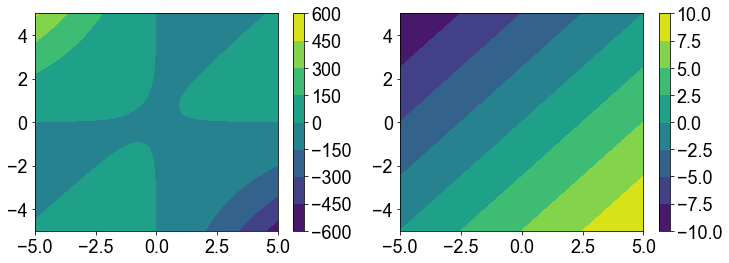

In [14]:
# plot just to get an idea 

x1_ls = np.linspace(-5,5,50)
x2_ls = np.linspace(-5,5,50)
x1_mg = np.zeros((50,50))
x2_mg = np.zeros((50,50))
res1_mg = np.zeros((50,50))
res2_mg = np.zeros((50,50))
for i in range(50):
    for j in range(50):
        x1_mg[i,j] = x1_ls[i]
        x2_mg[i,j] = x2_ls[j]
        res1_mg[i,j] = res([x1_ls[i],x2_ls[j]])[0]
        res2_mg[i,j] = res([x1_ls[i],x2_ls[j]])[1]

fig, _axs = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
cs1 = _axs[0].contourf(x1_mg,x2_mg,res1_mg)
cs2 = _axs[1].contourf(x1_mg,x2_mg,res2_mg)
fig.colorbar(cs1, ax=_axs[0])
fig.colorbar(cs2, ax=_axs[1])

#plt.savefig('L2E02contour.png')

In [23]:
# Newton Raphson, start at 0.2,0.5 
#x_sol = np.array([0.2,0.5])
x_sol = np.array([2.5,2.0])
tol = 1e-3
itermax=100
iter=0
x1_iter = [x_sol[0]]
x2_iter = [x_sol[1]]
while np.linalg.norm(res(x_sol))>tol and iter<itermax:
    x_sol -= np.linalg.solve(dres(x_sol),res(x_sol))
    x1_iter.append(x_sol[0])
    x2_iter.append(x_sol[1])
    iter+=1
print('Iterations: %i'%(iter))
print('solution, x=%f,%f '%(x_sol[0],x_sol[1]))

Iterations: 4
solution, x=1.000076,1.000076 


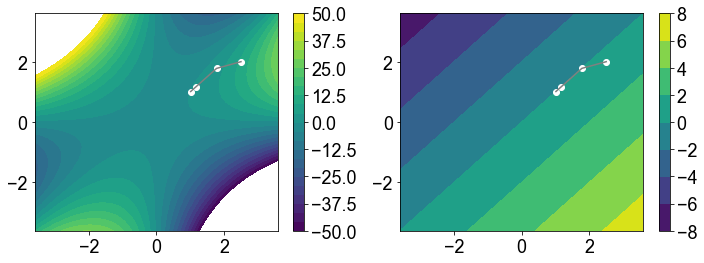

In [27]:
# plot sequence of points 
x1_ls = np.linspace(-3.6,3.6,50)
x2_ls = np.linspace(-3.6,3.6,50)
x1_mg = np.zeros((50,50))
x2_mg = np.zeros((50,50))
res1_mg = np.zeros((50,50))
res2_mg = np.zeros((50,50))
for i in range(50):
    for j in range(50):
        x1_mg[i,j] = x1_ls[i]
        x2_mg[i,j] = x2_ls[j]
        res1_mg[i,j] = res([x1_ls[i],x2_ls[j]])[0]
        res2_mg[i,j] = res([x1_ls[i],x2_ls[j]])[1]

fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
cs1 = axs[0].contourf(x1_mg,x2_mg,res1_mg,levels=np.linspace(-50,50,25))
# Plot up to point 'i' in the iterations 
i=4
axs[0].plot(x1_iter[:i],x2_iter[:i],color='grey')
axs[0].scatter(x1_iter[:i],x2_iter[:i],color='white')
cs2 = axs[1].contourf(x1_mg,x2_mg,res2_mg)
axs[1].plot(x1_iter[:i],x2_iter[:i],color='grey')
axs[1].scatter(x1_iter[:i],x2_iter[:i],color='white')
fig.colorbar(cs1, ax=axs[0])
fig.colorbar(cs2, ax=axs[1])
plt.savefig('images/L02E02NR_i4.png')